# Python for Data Science L1 Case Study

Importing Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

Importing Datasets

In [2]:
movies = pd.read_csv("D:\AIML\Python for Data Science Case Study L1\ml-1m\movies.csv",names=['MovieID','Title','Genres'],delimiter='::',header=None)

C:\Users\va20170670\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [3]:
movies.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [4]:
ratings = pd.read_csv("D:\AIML\Python for Data Science Case Study L1\ml-1m\\ratings.csv",delimiter="::",names=['UserID','MovieID','Ratings','Timestamp'])

C:\Users\va20170670\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [5]:
ratings.head()

,UserID,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291


In [6]:
users = pd.read_csv("D:\AIML\Python for Data Science Case Study L1\ml-1m\\users.csv",delimiter="::",names=['UserID','Gender','Age','Occupation','Zip-code'])

C:\Users\va20170670\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  """Entry point for launching an IPython kernel.


In [7]:
users.head()

,UserID,Gender,Age,Occupation,Zip-code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [8]:
movie_updated = movies.merge(ratings,how='inner',on = 'MovieID')

In [9]:
movie_updated.head()

,MovieID,Title,Genres,UserID,Ratings,Timestamp
0,1,Toy Story (1995),Animation|Children's|Comedy,1,5,978824268
1,1,Toy Story (1995),Animation|Children's|Comedy,6,4,978237008
2,1,Toy Story (1995),Animation|Children's|Comedy,8,4,978233496
3,1,Toy Story (1995),Animation|Children's|Comedy,9,5,978225952
4,1,Toy Story (1995),Animation|Children's|Comedy,10,5,978226474


In [10]:
movies_integrated = movie_updated.merge(users,how='left',on='UserID')

In [11]:
movies_integrated.to_csv('movies_integrated.csv')

In [12]:
genres_unique = pd.DataFrame(movies_integrated['Genres'].str.split('|').tolist()).stack().unique()
genres_unique = pd.DataFrame(genres_unique, columns=['Genres'])

In [13]:
movies_integrated = movies_integrated.join(movies_integrated['Genres'].str.get_dummies().astype(bool))
movies_integrated.drop('Genres', inplace=True, axis=1)

In [14]:
movies_integrated['Timestamp'] = pd.to_datetime(movies_integrated['Timestamp'], infer_datetime_format=True)
movies_integrated['Timestamp'] = movies_integrated['Timestamp'].dt.year

In [15]:
movies_integrated.head(10)

,MovieID,Title,UserID,Ratings,Timestamp,Gender,Age,Occupation,Zip-code,Action,...,Fantasy,Film-Noir,Horror,Musical,Mystery,Romance,Sci-Fi,Thriller,War,Western
0,1,Toy Story (1995),1,5,1970,F,1,10,48067,False,...,False,False,False,False,False,False,False,False,False,False
1,1,Toy Story (1995),6,4,1970,F,50,9,55117,False,...,False,False,False,False,False,False,False,False,False,False
2,1,Toy Story (1995),8,4,1970,M,25,12,11413,False,...,False,False,False,False,False,False,False,False,False,False
3,1,Toy Story (1995),9,5,1970,M,25,17,61614,False,...,False,False,False,False,False,False,False,False,False,False
4,1,Toy Story (1995),10,5,1970,F,35,1,95370,False,...,False,False,False,False,False,False,False,False,False,False
5,1,Toy Story (1995),18,4,1970,F,18,3,95825,False,...,False,False,False,False,False,False,False,False,False,False
6,1,Toy Story (1995),19,5,1970,M,1,10,48073,False,...,False,False,False,False,False,False,False,False,False,False
7,1,Toy Story (1995),21,3,1970,M,18,16,99353,False,...,False,False,False,False,False,False,False,False,False,False
8,1,Toy Story (1995),23,4,1970,M,35,0,90049,False,...,False,False,False,False,False,False,False,False,False,False
9,1,Toy Story (1995),26,3,1970,M,25,7,23112,False,...,False,False,False,False,False,False,False,False,False,False


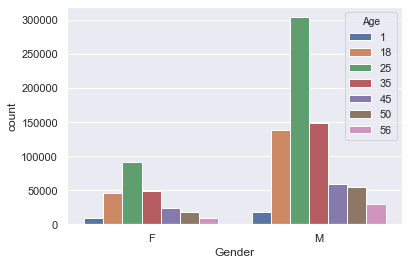

In [16]:
sns.countplot(movies_integrated['Gender'],hue=movies_integrated['Age'])

In [17]:
movies_integrated.dtypes

MovieID         int64
Title          object
UserID          int64
Ratings         int64
Timestamp       int64
Gender         object
Age             int64
Occupation      int64
Zip-code       object
Action           bool
Adventure        bool
Animation        bool
Children's       bool
Comedy           bool
Crime            bool
Documentary      bool
Drama            bool
Fantasy          bool
Film-Noir        bool
Horror           bool
Musical          bool
Mystery          bool
Romance          bool
Sci-Fi           bool
Thriller         bool
War              bool
Western          bool
dtype: object

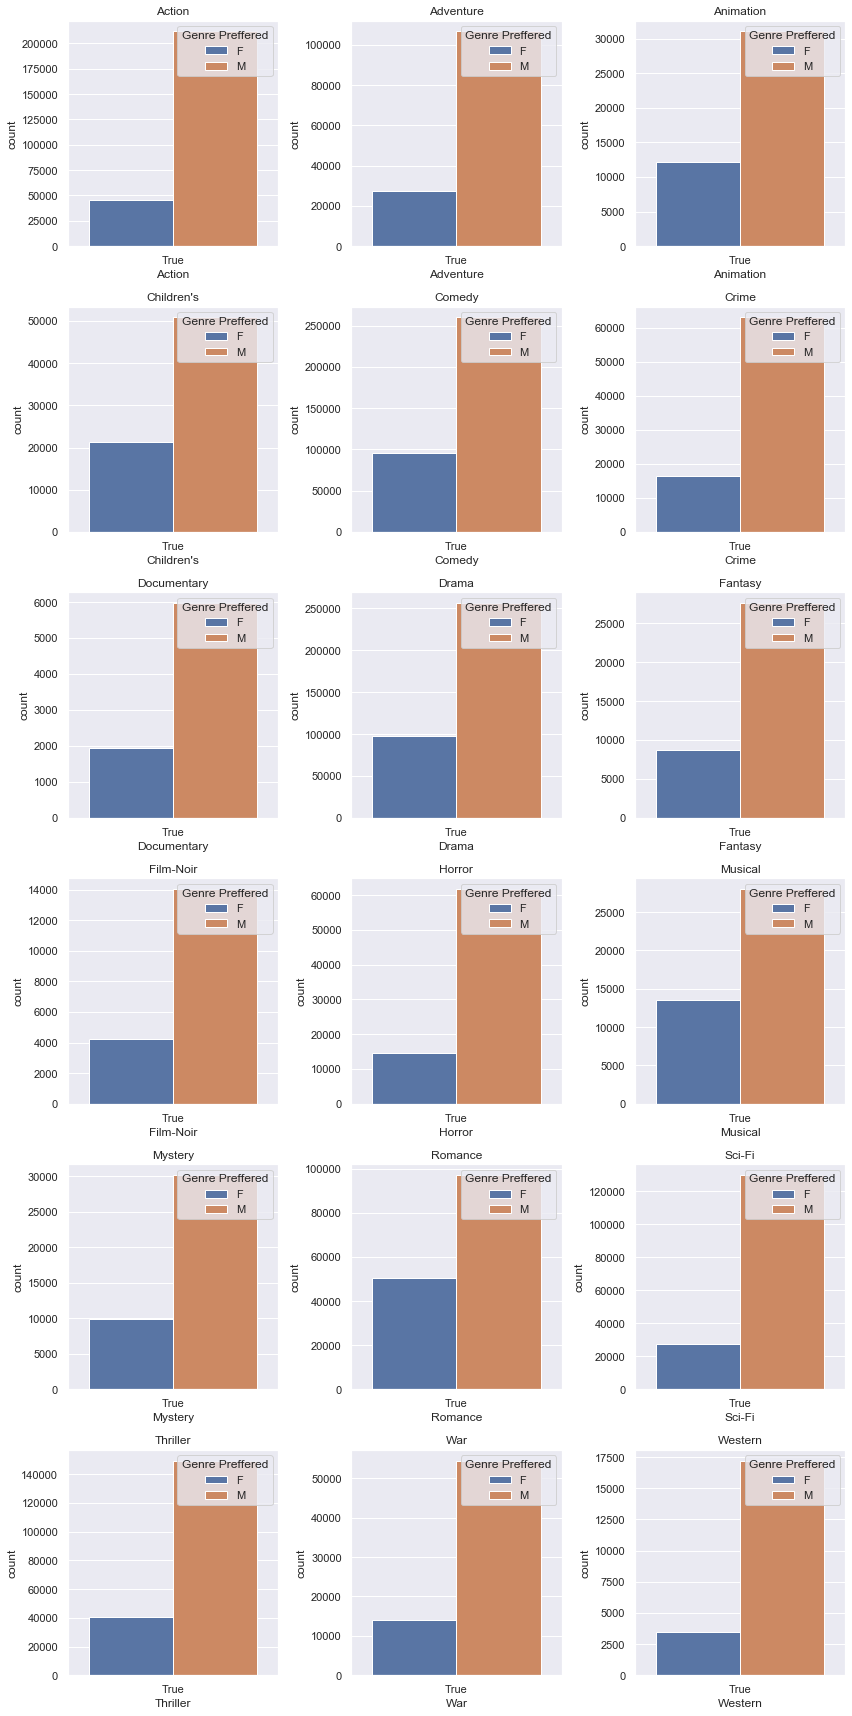

In [18]:
cols = ['Action', 'Adventure', 'Animation', "Children's", 'Comedy', 'Crime','Documentary','Drama','Fantasy','Film-Noir','Horror','Musical','Mystery','Romance','Sci-Fi','Thriller','War','Western']

n_rows = 6
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))
fig.set_size_inches(12, 24)
for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c      
        ax = axs[r][c]
        sns.countplot(movies_integrated[cols[i]].drop(index=movies_integrated[movies_integrated[cols[i]] == False].index), hue=movies_integrated['Gender'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Genre Preffered", loc='upper right') 
        
plt.tight_layout()

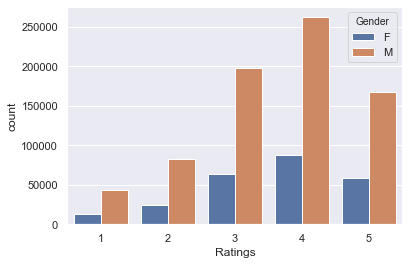

In [19]:
sns.countplot(movies_integrated['Ratings'],hue = movies_integrated['Gender'])

In [20]:
5+6

11

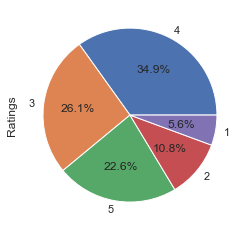

In [21]:
movies_integrated['Ratings'].value_counts().plot.pie(autopct='%1.1f%%')
plt.show()

In [22]:
Rating_female = movies_integrated['Ratings'].drop(index = movies_integrated[movies_integrated['Gender']=='M'].index)

In [23]:
Rating_male = movies_integrated['Ratings'].drop(index = movies_integrated[movies_integrated['Gender']=='F'].index)

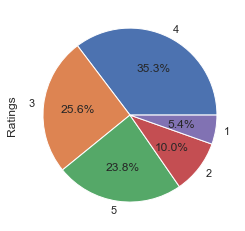

In [24]:
Rating_female.value_counts().plot.pie(autopct='%1.1f%%')

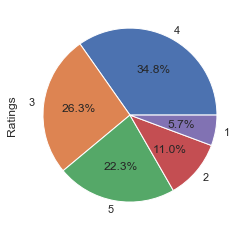

In [25]:
Rating_male.value_counts().plot.pie(autopct='%1.1f%%')

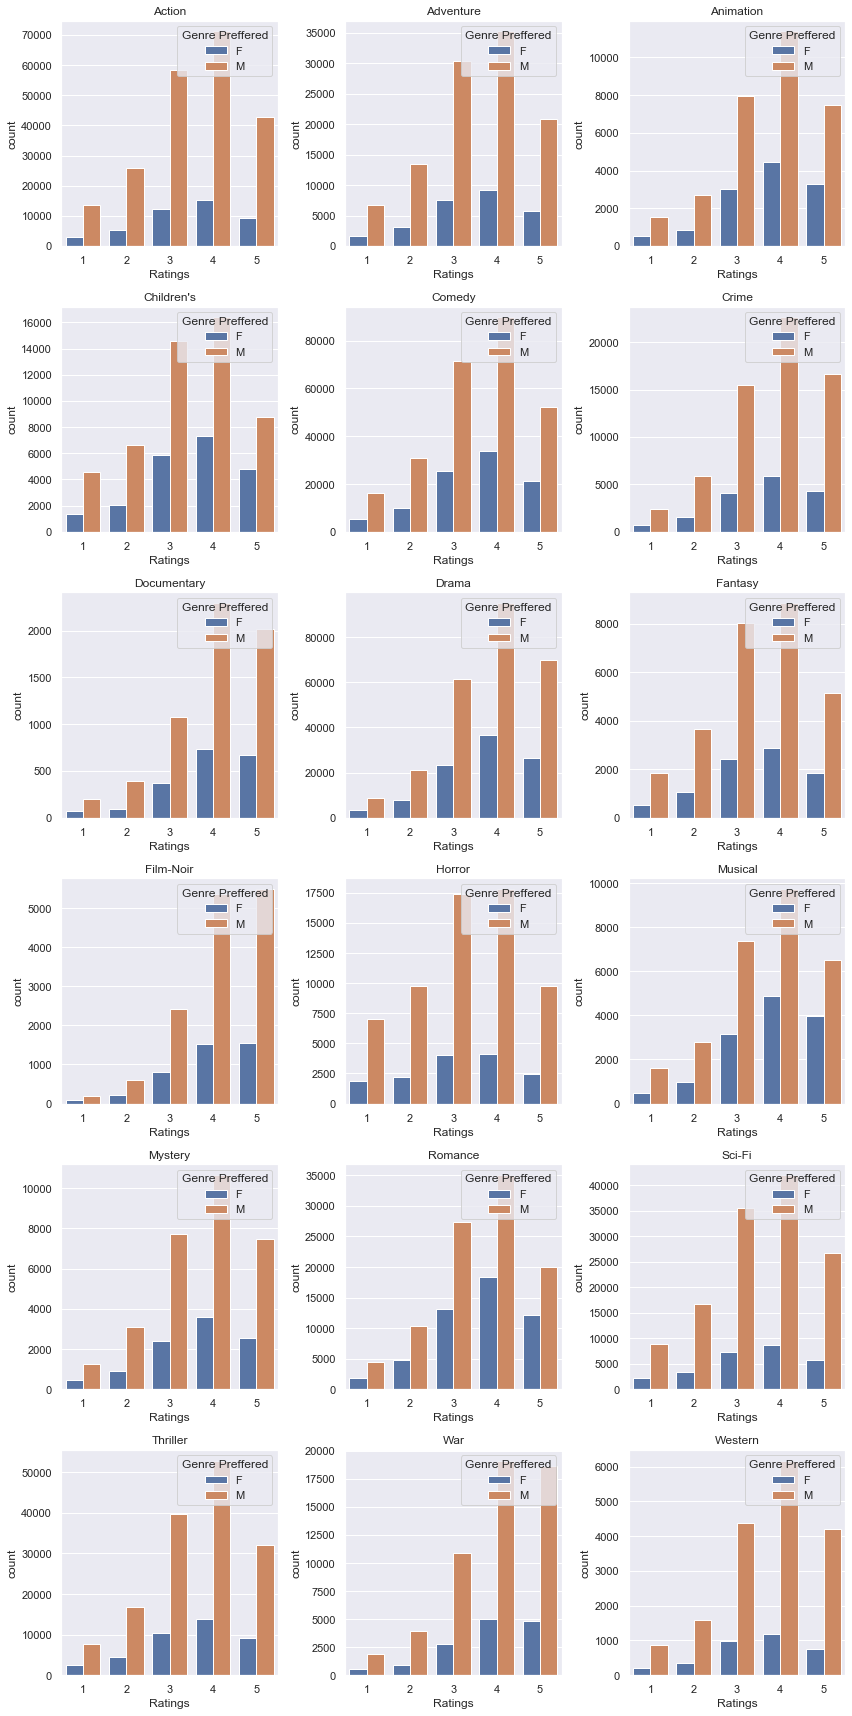

In [26]:
n_rows = 6
n_cols = 3

fig, axs = plt.subplots(n_rows, n_cols, figsize=(n_cols*3.2,n_rows*3.2))
fig.set_size_inches(12, 24)
for r in range(0,n_rows):
    for c in range(0,n_cols):  
        
        i = r*n_cols+ c      
        ax = axs[r][c]
        sns.countplot(movies_integrated['Ratings'].drop(index=movies_integrated[movies_integrated[cols[i]] == False].index), hue=movies_integrated['Gender'], ax=ax)
        ax.set_title(cols[i])
        ax.legend(title="Genre Preffered", loc='upper right') 
        
plt.tight_layout()